морозов вариант 14

a=4
cigma^2=9
n=90
q=1,35
k=5
правило скотта
зр 
Треугольное на отрезке (0, 5) и модой, равной 3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from scipy.stats import norm

    1. Смоделировать выборку из п независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a,2).
       

In [30]:
def create_norm(a,sigma,n_points):
    # генерация выборки
    X = norm.rvs(loc=a, scale=sigma, size=n_points)
    print(X)
    return X




a = 4 # среднее значение
sigma = 3# стандартное отклонение
n_points = 90 # размер выборки


X=create_norm(a,sigma,n_points)



   




[-4.34064202e+00  4.65536103e+00  3.55317941e+00 -1.66939758e+00
  7.55512524e-01  6.66537780e+00  1.53724496e+00  7.30742088e+00
  5.11546964e+00  7.34786909e+00  2.48857050e+00  7.80972246e+00
  8.49484793e+00  4.91401285e+00 -1.01253349e+00  2.91528695e+00
  5.66966519e+00  3.16571545e+00  5.97860406e+00  3.42118019e+00
  8.17202258e+00 -3.49010745e+00  3.21554544e+00  8.16322529e+00
  6.20058145e+00  5.40663958e+00  5.37459512e+00  8.86686541e+00
  5.91279228e+00  5.72685871e+00  6.24700141e+00  8.59361216e+00
  8.09314453e+00  6.47213837e+00  4.68884002e+00  1.76036287e+00
  1.42811219e+00  2.55406693e+00  5.00010694e+00  6.19657187e+00
  8.19161536e+00  7.33591017e+00  2.70729519e+00  1.98853009e-03
  4.82098272e+00  1.57013104e-01 -1.61423174e+00  6.15128436e+00
  8.90551654e+00  3.27669303e+00  9.56099378e+00  4.86389689e+00
  8.02366767e+00  5.18349916e+00  2.49476042e+00 -3.40418992e-01
  8.09480258e+00  5.95127649e+00  2.76203444e+00  1.01513207e+01
  3.51705788e+00  1.56664

Сгруппировать данные в интервалы и найти интервальный ряд абсолютных частот. Число интервалов группировки выбрать в соответствии с правилом, указанном в Вашем варианте.( Правило скотта  k = 3.5 * σ * n^(-1/3).) 
Вычислить средствами Python сумму абсолютных частот. Построить диаграмму абсолютных частот

Интервальный ряд абсолютных частот: [25 65]
Сумма абсолютных частот: 90


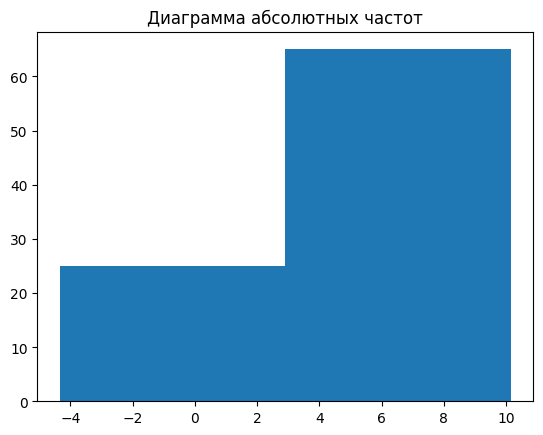

In [31]:
def group_data_and_absolute(X):
     # группировка данных в интервалы и нахождение интервального ряда абсолютных частот
    n_intervals =3.5*sigma* n_points**(-1/3) # число интервалов группировки правилом скотта
    hist, bins = np.histogram(X, bins=int(n_intervals))
    print("Интервальный ряд абсолютных частот:", hist)

    # вычисление суммы абсолютных частот
    sum_freq = sum(hist)
    print("Сумма абсолютных частот:", sum_freq)

    # построение диаграммы абсолютных частот
    plt.hist(X, bins=int(n_intervals))
    plt.title("Диаграмма абсолютных частот")
    plt.show()
    return hist,sum_freq,bins

hist,sum_freq,bins=group_data_and_absolute(X)


Сгруппировать данные в интервалы и найти интервальный ряд относительных частот. Вычислить средствами Python сумму относительных частот. Построить диаграмму относительных частот.

Интервальный ряд относительных частот: [0.51111111 0.48888889]
Сумма относительных частот: 1.0


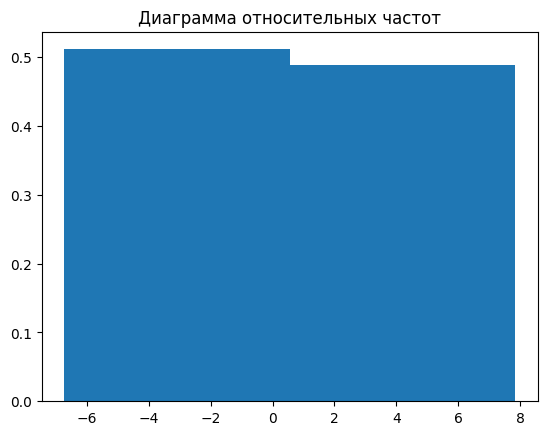

In [18]:
def  group_data_and_relative(X,hist,sum_freq,bins):
    # группировка данных в интервалы и нахождение интервального ряда относительных частот
    rel_freq = hist / sum_freq # относительные частоты
    print("Интервальный ряд относительных частот:", rel_freq)

    # вычисление суммы относительных частот
    sum_rel_freq = sum(rel_freq)
    print("Сумма относительных частот:", sum_rel_freq)

    # построение диаграммы относительных частот
    plt.bar(bins[:-1], rel_freq, width=(bins[1]-bins[0]))
    plt.title("Диаграмма относительных частот")
    plt.show()

group_data_and_relative(X,hist,sum_freq,bins)


Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины X (причем гистограмму и кривую распределения разместить на одном рисунке).

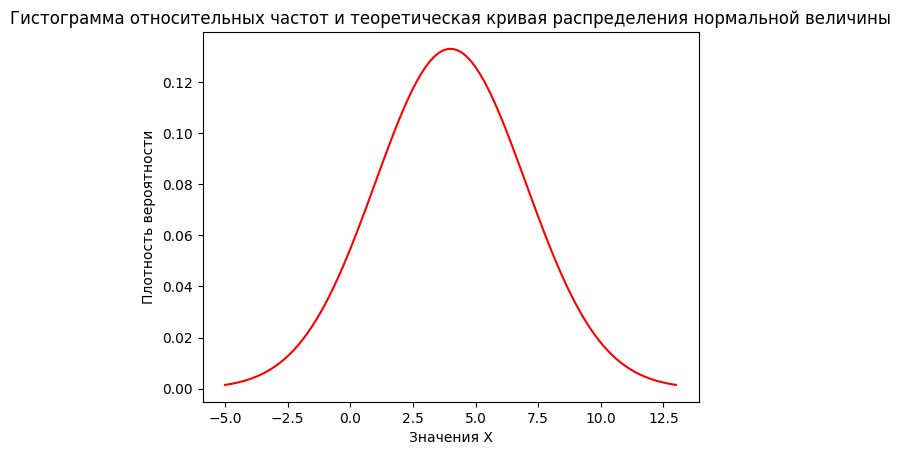

In [32]:
def plot_histogram_and_teoretical(r,bin_edges,mu,sigma):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-mu)**2/(2*sigma**2))
    # Строим теоретическую кривую распределения
    plt.plot(x, y, color='r')

    # Добавляем подписи осей и заголовок графика
    plt.title('Гистограмма относительных частот и теоретическая кривая распределения нормальной величины')
    plt.xlabel('Значения X')
    plt.ylabel('Плотность вероятности')

    # Отображаем график
    plt.show()

plot_histogram_and_teoretical(X,bins,a,sigma)

Построить гистограмму абсолютных и график теоретической частоты распределения случайной величины X (причем и гистограмму, и график теоретической частоты разместить на одном рисунке).

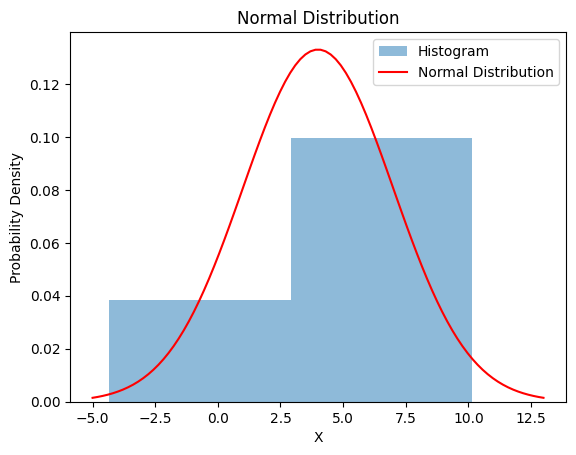

In [36]:



def plot_histogram_and_teoretical2(bin_edges,mu,sigma):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 90)

    # Calculate the theoretical probability density function for X
    pdf = norm.pdf(x, mu, sigma)

    # Plot the histogram and the normal distribution curve on the same figure
    plt.hist(X, bins=2, density=True, alpha=0.5, label='Histogram')
    plt.plot(x, pdf, 'r', label='Normal Distribution')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Probability Density')
    plt.title('Normal Distribution')
    plt.show()
plot_histogram_and_teoretical2(bin,a,sigma)

Построить по выборке график эмпирической функции распределения случайной величины X (кумуляту относительных частот) и график теоретической функции распределения  случайной величины X, разместив их на одном рисунке.

Построить по выборке бокс-плот распределения (“ящик с усами”) и дать ему статистическую интерпретацию. В частности, ответить на вопрос: Каково теоретически ожидаемое число выбросов для выборки данного объема?

Проанализировав результаты п.1 и 2., ответить на следующие вопросы:
Какова Ваша оценка вероятности попадания значений случайной  величины X в k-ый интервал полученной группировки?
 Какой из полученных в п.2 графиков содержит геометрическую интерпретацию этой оценки, покажите ее на графике.
Какой из полученных в п.2 графиков содержит геометрическую интерпретацию вероятности попадания значений случайной  величины X в k-ый интервал, покажите ее на графике.
Какова Ваша оценка значения интегральной функции распределения в правой границе k-ого интервала полученной группировки? А чему равно точное значение интегральной функции распределения в правой границе k-ого интервала?



Используя таблицу значений функции Лапласа, найти вероятность 
(вычисления вероятности сделать “вручную” )
P(|X-MX|<q)                                            (*)
     3.1. Найти вероятность (*), используя встроенные функции Python.


. Найдите по выборке оценку вероятности (*), т.е. относительную частоту события 
{|X-MX|<q}.


Увеличьте объем выборки п в 50 раз и повторите п. 2.2. Объясните, как увеличение объема выборки повлияло на точность  оценки вероятности (*).

Вычислить по выборке точечные оценки параметров распределения случайной величины X: математического ожидания, медианы, дисперсии, стандартного отклонения, коэффициента ассиметрии, эксцесса двумя способами

первый способ –непосредственное применение формул для вычисления   точечных оценок;
второй способ – применение встроенных функций Python, например,  describe, std, mean  и т.д.


Увеличьте объем выборки п в 50 раз и повторите п. 4. 2.

Проанализировав результаты п.4, ответить на следующие вопросы:
Чему равны коэффициенты асимметрии и эксцесса распределения случайной величины X? 
 Объясните, как увеличение объема выборки повлияло на точность  оценок параметров распределения. 
Какое свойство точечных оценок параметров распределения случайной величины X объясняет такое поведение оценок параметров распределения в ответ на рост объема выборки?

In [ ]:
1.Смоделировать выборку из п независимых наблюдений над случайной величиной Y, имеющей закон распределения, указаный в Вашем варианте. 


Для визуализации данных построить гистограмму относительных частот и теоретическую кривую распределения случайной величины Y (причем гистограмму и кривую распределения разместить на одном рисунке).

Построить по выборке бокс-плот распределения (“ящик с усами”) случайной величины Y и дать ему статистическую интерпретацию. В частности, ответить на вопрос: 
Каково теоретически ожидаемое число выбросов для выборки данного объема?


Проанализировав результаты п.1 и 2, ответить на следующие вопросы:
Какова Ваша оценка вероятности попадания значений случайной  величины Y в k-ый интервал полученной группировки? 
Какова вероятность попадания значений случайной  величины Y в k-ый интервал полученной группировки? 

Используя теоретические знания о функции распределения случайной величины, найти  вероятность (вычисления вероятности сделать “вручную” ) 
P(|Y -M Y |< q)                                            (*)


Найти вероятность (*), используя встроенные функции Python

Найдите по выборке оценку вероятности (*), т.е. относительную частоту события 
{ Y -M Y |<q}.


Увеличьте объем выборки п в 50 раз и повторите п. 2.2. Объясните, как увеличение объема выборки повлияло на точность  оценки вероятности (*).


Вычислить по выборке точечные оценки параметров распределения случайной величины X: математического ожидания, медианы, дисперсии, стандартного отклонения, коэффициента ассиметрии, эксцесса, применяя встроенных функций Python, например,  describe, std, mean  и т.д.


Чему равны коэффициенты ассиметрии и эксцесса распределения случайной величины Y?  Объясните, как увеличение объема выборки повлияло на точность  оценок параметров распределения